In [4]:
import pandas as pd
df = pd.read_csv('chapter_3/banksim.csv')

In [5]:
df.head()

,Unnamed: 0,age,gender,category,amount,fraud
0,171915,3,F,es_transportation,49.71,0
1,426989,4,F,es_health,39.29,0
2,310539,3,F,es_transportation,18.76,0
3,215216,4,M,es_transportation,13.95,0
4,569244,2,M,es_transportation,49.87,0


In [6]:
df.groupby('category')['amount', 'fraud'].mean()

C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,amount,fraud
category,,
es_barsandrestaurants,43.841793,0.022472
es_contents,55.170000,0.000000
es_fashion,59.780769,0.020619
es_food,35.216050,0.000000
es_health,126.604704,0.242798
es_home,120.688317,0.208333
es_hotelservices,172.756245,0.548387
es_hyper,46.788180,0.125000
es_leisure,229.757600,1.000000


In [7]:
df.groupby('age')['amount', 'fraud'].mean()

C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,amount,fraud
age,,
0,49.468935,0.050000
1,35.622829,0.026648
2,37.228665,0.028718
3,37.279338,0.023283
4,36.197985,0.035966
5,37.547521,0.023990
6,36.700852,0.022293
U,39.117000,0.000000


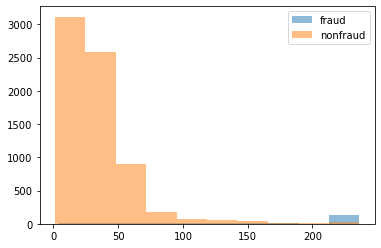

In [8]:
import matplotlib.pyplot as plt
df_fraud = df.loc[df.fraud==1]
df_non_fraud = df.loc[df.fraud==0]
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.legend()
plt.show()

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('chapter_3/banksim_adj.csv')

In [6]:
df.head()

,Unnamed: 0,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,0,3,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,4,39.29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,3,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,4,13.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,2,49.87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [9]:
X = df.drop(['Unnamed: 0', 'fraud'], axis=1)
y = df[['fraud']]

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
#scaled_features = X.copy()
# scaled_features = X.copy()
# col_names = ['age', 'amount']
# features = scaled_features[col_names]
# scaler = MinMaxScaler().fit(features.values)
# features = scaler.transform(features.values)
# scaled_features[col_names] = features
# print(scaled_features)
# X_scaled=scaled_features

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
X = np.array(df).astype(np.float)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=6).fit(X_scaled)

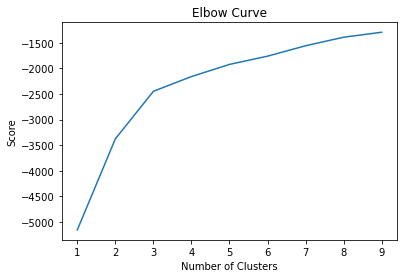

In [31]:
import matplotlib.pyplot as plt
clust = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in clust]
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
plt.plot(clust,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [32]:
# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

MiniBatchKMeans(n_clusters=3, random_state=0)

Text(0, 0.5, 'Score')

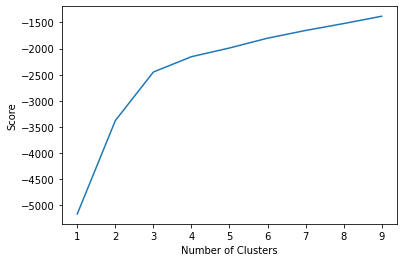

In [33]:
clustno = range(1, 10)
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [35]:
X_train

array([[0.1189054 , 0.16666667, 0.05577679, ..., 0.        , 1.        ,
        0.        ],
       [0.54688151, 0.5       , 0.09274802, ..., 0.        , 1.        ,
        0.        ],
       [0.01944715, 0.5       , 0.08551544, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.91095986, 0.33333333, 0.04773586, ..., 0.        , 1.        ,
        0.        ],
       [0.91193221, 0.33333333, 0.15664997, ..., 0.        , 1.        ,
        0.        ],
       [0.64481178, 0.33333333, 0.08598343, ..., 0.        , 1.        ,
        0.        ]])

In [36]:
#kmeans = KMeans(n_clusters=3, n_jobs=-1).fit(X_train)
kmeans = MiniBatchKMeans(n_clusters=3).fit(X_train)
X_clusters = kmeans.predict(X_test)
X_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(X_test, X_clusters_centers[X_clusters])]
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

In [37]:
from sklearn import metrics
print(metrics.roc_auc_score(y_test, km_y_pred))

0.973562635841756


In [38]:
km_cm = metrics.confusion_matrix(y_test, km_y_pred)
km_cm

array([[1706,   33],
       [   2,   57]], dtype=int64)

In [57]:
y.value_counts()

fraud
0        6989
1         200
dtype: int64

In [61]:
# Import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Initialize and fit the DBSCAN model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in labels else 0)

In [64]:
print('Estimated number of clusters: %d' % n_clusters)

Estimated number of clusters: 26


In [69]:
print(labels.shape, pred_labels.shape)

(7189, 1) (7189,)


In [71]:
reshaped_labels = labels.reshape(pred_labels.shape)

In [72]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(reshaped_labels, pred_labels))

Homogeneity: 0.922


In [73]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))

Silhouette Coefficient: 0.564


In [118]:
counts = np.bincount(pred_labels[pred_labels >= 0])

# Print the result
print(counts)

[3252  105 2714   46  174  119  112   79   52   74   43   24   45   42
   11   19   16   13   10   15   35   10   40   19   11]


In [82]:
np.argsort(counts)

array([21, 18, 24, 14, 17, 19, 16, 15, 23, 11, 20, 22, 13, 10, 12,  3,  8,
        9,  7,  1,  6,  5,  4,  2,  0], dtype=int64)

In [80]:
smallest_clusters = np.argsort(counts)[:11]

# Print the results 
print("The smallest clusters are clusters:")      
print(sum(smallest_clusters))

The smallest clusters are clusters:
198


In [122]:
sum(df['clusternr']==-1)

109

In [87]:
# Create a dataframe of the predicted cluster numbers and fraud labels
df = pd.DataFrame({'clusternr':pred_labels,'fraud':reshaped_labels})
df

,clusternr,fraud
0,0,0
1,1,0
2,0,0
3,2,0
4,2,0
...,...,...
7184,24,1
7185,-1,1
7186,-1,1
7187,24,1


In [129]:
# # Create a condition flagging fraud for the smallest clusters 
# df['predicted_fraud'] = np.where((df['clusternr']==14) | (df['clusternr']==15) | \
#                                  (df['clusternr']==16) | (df['clusternr']==17) | \
#                                  (df['clusternr']==18) | (df['clusternr']==19) | \
#                                  (df['clusternr']==21) | (df['clusternr']==23) | \
#                                  (df['clusternr']==24) | (df['clusternr']==-1), 1, 0)

In [132]:
df.loc[df['fraud']==1]['clusternr'].value_counts()

-1     70
 22    40
 20    35
 23    19
 19    15
 24    11
 21    10
Name: clusternr, dtype: int64

In [133]:
# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr']==-1) | (df['clusternr']==22) | \
                                 (df['clusternr']==20) | (df['clusternr']==23) | \
                                 (df['clusternr']==19) | (df['clusternr']==24) | \
                                 (df['clusternr']==21), 1, 0)

In [134]:
# Run a crosstab on the results 
print(pd.crosstab(df['fraud'], df['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0    1
Actual Fraud            
0              6950   39
1                 0  200
